In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("brewery").getOrCreate()
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

23/12/15 06:53:23 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
path = 'gs://final_project_123/output_00.csv'

df_0 = spark.read.csv(path, inferSchema = True, header = True)

In [8]:
path = 'gs://final_project_123/output_01.csv'
df_1 = spark.read.csv(path, inferSchema = True, header = True)

In [9]:
path = 'gs://final_project_123/output_02.csv'
df_2 = spark.read.csv(path, inferSchema = True, header = True)

In [10]:
path = 'gs://final_project_123/output_03.csv'
df_3 = spark.read.csv(path, inferSchema = True, header = True)

In [11]:
path = 'gs://final_project_123/output_04.csv'
df_4 = spark.read.csv(path, inferSchema = True, header = True)

In [12]:
path = 'gs://final_project_123/output_05.csv'
df_5 = spark.read.csv(path, inferSchema = True, header = True)

In [13]:
path = 'gs://final_project_123/output_06.csv'
df_6 = spark.read.csv(path, inferSchema = True, header = True)

In [14]:
df_brewery = df_0.union(df_1).union(df_2).union(df_3).union(df_4).union(df_5).union(df_6)

In [ ]:
df_brewery.show(2)

+-------+-------------------+----------+----+----------+---+-----------------+----+----+------------------+-----------------+-----------------+------------------+------------------+-----------------+
|    \N0|          Brew_Date|Beer_Style| SKU|  Location|\N5|              \N6| \N7| \N8|               \N9|             \N10|             \N11|              \N12|              \N13|             \N14|
+-------+-------------------+----------+----+----------+---+-----------------+----+----+------------------+-----------------+-----------------+------------------+------------------+-----------------+
|7870796|2020-01-01 00:00:19|Wheat Beer|Kegs|Whitefield| 16|5.370842159553436|20.0|4666|2664.7593448382822| 8.57701633109399|89.19588216376087|4.1049876591878345|3.2354851724654683|4.663204448186049|
|9810411|2020-01-01 00:00:31|      Sour|Kegs|Whitefield| 13|5.096053082797625|36.0| 832| 9758.801062471319|7.420540752553908| 72.4809153900275|2.6765280953921122|4.2461292104108574| 2.04435836917023|


In [16]:
df_brewery.printSchema()

root
 |-- \N0: integer (nullable = true)
 |-- Brew_Date: timestamp (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- \N5: integer (nullable = true)
 |-- \N6: double (nullable = true)
 |-- \N7: double (nullable = true)
 |-- \N8: integer (nullable = true)
 |-- \N9: double (nullable = true)
 |-- \N10: double (nullable = true)
 |-- \N11: double (nullable = true)
 |-- \N12: double (nullable = true)
 |-- \N13: double (nullable = true)
 |-- \N14: double (nullable = true)



In [17]:
new_header = ["Batch_ID", "Brew_Date", "Beer_Style", "SKU", "Location", "Fermentation_Time", "Alcohol_Content", "Bitterness", "Volume_Produced", "Total_Sales", "Quality_Score", "Brewhouse_Efficiency", "Loss_During_Brewing", "Loss_During_Fermentation", "Loss_During_Bottling_Kegging"]

In [19]:
df_brewery = df_brewery.toDF(*new_header)


In [20]:
df_brewery.show(3)

+--------+-------------------+----------+----+-----------+-----------------+-----------------+----------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+
|Batch_ID|          Brew_Date|Beer_Style| SKU|   Location|Fermentation_Time|  Alcohol_Content|Bitterness|Volume_Produced|       Total_Sales|    Quality_Score|Brewhouse_Efficiency|Loss_During_Brewing|Loss_During_Fermentation|Loss_During_Bottling_Kegging|
+--------+-------------------+----------+----+-----------+-----------------+-----------------+----------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+
| 7870796|2020-01-01 00:00:19|Wheat Beer|Kegs| Whitefield|               16|5.370842159553436|      20.0|           4666|2664.7593448382822| 8.57701633109399|   89.19588216376087| 4.1049876591878345|      3.2354851724654683|           4.6

In [21]:
df_brewery.printSchema()

root
 |-- Batch_ID: integer (nullable = true)
 |-- Brew_Date: timestamp (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Alcohol_Content: double (nullable = true)
 |-- Bitterness: double (nullable = true)
 |-- Volume_Produced: integer (nullable = true)
 |-- Total_Sales: double (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Brewhouse_Efficiency: double (nullable = true)
 |-- Loss_During_Brewing: double (nullable = true)
 |-- Loss_During_Fermentation: double (nullable = true)
 |-- Loss_During_Bottling_Kegging: double (nullable = true)



In [26]:
df_averages = df_brewery.groupBy('Beer_Style').agg({'Volume_Produced':'avg'})

In [27]:
df_averages.show()

+----------+--------------------+
|Beer_Style|avg(Volume_Produced)|
+----------+--------------------+
|    Porter|   2748.553356204523|
|      Sour|  2745.7217313201727|
|     Lager|   2751.240178013379|
|Wheat Beer|   2748.871281690795|
|   Pilsner|  2749.7058014686754|
|       Ale|  2748.5902401356993|
|     Stout|   2748.720462994363|
|       IPA|  2750.8452635319086|
+----------+--------------------+



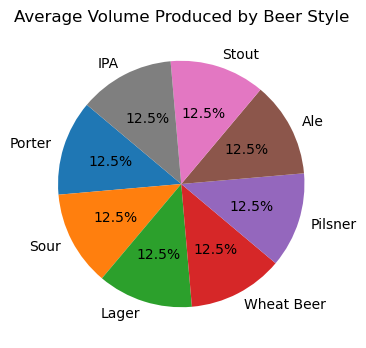

In [28]:
df_pandas = df_averages.toPandas()

plt.figure(figsize=(5, 4))
plt.pie(df_pandas['avg(Volume_Produced)'], labels=df_pandas['Beer_Style'], autopct='%1.1f%%', startangle=140)
plt.title('Average Volume Produced by Beer Style')
plt.show()

In [29]:
df_Efficiency = df_brewery.groupBy('Location').agg({'Brewhouse_Efficiency':'avg'})

In [30]:
df_Efficiency.show()

+---------------+-------------------------+
|       Location|avg(Brewhouse_Efficiency)|
+---------------+-------------------------+
|    Malleswaram|        80.00505368208137|
|    Indiranagar|        80.00626954186589|
|      Jayanagar|        80.00626192413431|
|Electronic City|        79.99280441544744|
|      Yelahanka|        79.99677929824077|
|    Rajajinagar|        80.01115569481753|
|    Koramangala|        79.99314944364849|
|     HSR Layout|        79.99784849677621|
|     Whitefield|        80.00035483943377|
|   Marathahalli|        79.99952376926616|
+---------------+-------------------------+

